<a href="https://colab.research.google.com/github/NolanMowery22/Data-Science-in-Health-Informatics-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Nolan Mowery Final Project ###
# Importing and Loading Dataset
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt


drive.mount('/content/drive')
pancreas = pd.read_csv('/content/drive/My Drive/MSHI/HI2023/Pancreas.csv')

pancreas.head(10)

####################### Questions to ask Zhou tomorrow ##########################
# treat 'names' as missing values or not?
# what do you mean options for categorical variable

In [ ]:
# Shape of Dataset
pancreas.shape

(590, 14)

In [ ]:
# Data in CSV
pancreas.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [ ]:
# Replacing NA values with 0
pancreas_fill = pancreas.fillna(0)

# Drop unused columns/zero values
drop_columns = ['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A']
new_pancreas = pancreas_fill.drop(columns = drop_columns)
new_pancreas.head(10)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,S1,Cohort1,BPTB,33,F,1,1.83222,0.893219,52.94884,654.282174
1,S10,Cohort1,BPTB,81,F,1,0.97266,2.037585,94.46703,209.488250
2,S100,Cohort2,BPTB,51,M,1,0.78039,0.145589,102.36600,461.141000
3,S101,Cohort2,BPTB,61,M,1,0.70122,0.002805,60.57900,142.950000
4,S102,Cohort2,BPTB,62,M,1,0.21489,0.000860,65.54000,41.088000
5,S103,Cohort2,BPTB,53,M,1,0.84825,0.003393,62.12600,59.793000
6,S104,Cohort2,BPTB,70,M,1,0.62205,0.174381,152.27700,117.516000
7,S105,Cohort2,BPTB,58,F,1,0.89349,0.003574,3.73000,40.294000
8,S106,Cohort2,BPTB,59,F,1,0.48633,0.001945,7.02100,26.782000
9,S107,Cohort2,BPTB,56,F,1,0.61074,0.278778,83.92800,19.185000


In [ ]:
# Adding a Diagnosis meaning column to the dataframe
diagnosis_txt = {1: 'control', 2: 'benign disease', 3: 'pancreas cancer'}
new_pancreas['Group'] = new_pancreas['diagnosis'].map(diagnosis_txt)



#Moving the diagnosis & meaning column next to each other in the dataset
new_order = ['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex', 'diagnosis', 'Group', 'creatinine', 'LYVE1', 'REG1B', 'TFF1']
new_pancreas = new_pancreas.reindex(columns = new_order)

new_pancreas.head(10)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,Group,creatinine,LYVE1,REG1B,TFF1
0,S1,Cohort1,BPTB,33,F,1,control,1.83222,0.893219,52.94884,654.282174
1,S10,Cohort1,BPTB,81,F,1,control,0.97266,2.037585,94.46703,209.488250
2,S100,Cohort2,BPTB,51,M,1,control,0.78039,0.145589,102.36600,461.141000
3,S101,Cohort2,BPTB,61,M,1,control,0.70122,0.002805,60.57900,142.950000
4,S102,Cohort2,BPTB,62,M,1,control,0.21489,0.000860,65.54000,41.088000
5,S103,Cohort2,BPTB,53,M,1,control,0.84825,0.003393,62.12600,59.793000
6,S104,Cohort2,BPTB,70,M,1,control,0.62205,0.174381,152.27700,117.516000
7,S105,Cohort2,BPTB,58,F,1,control,0.89349,0.003574,3.73000,40.294000
8,S106,Cohort2,BPTB,59,F,1,control,0.48633,0.001945,7.02100,26.782000
9,S107,Cohort2,BPTB,56,F,1,control,0.61074,0.278778,83.92800,19.185000


In [ ]:
# Counting different values of Diagnosis Column for other missing data
diagnoses = new_pancreas.iloc[:,5]
diagnoses
diagnoses.value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [ ]:
# Checking that all missing data is removed
cleaned_pancreas = new_pancreas.dropna(axis = 1) # will drop columns w/ missing data indicating whats missing
cleaned_pancreas

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,Group,creatinine,LYVE1,REG1B,TFF1
0,S1,Cohort1,BPTB,33,F,1,control,1.83222,0.893219,52.948840,654.282174
1,S10,Cohort1,BPTB,81,F,1,control,0.97266,2.037585,94.467030,209.488250
2,S100,Cohort2,BPTB,51,M,1,control,0.78039,0.145589,102.366000,461.141000
3,S101,Cohort2,BPTB,61,M,1,control,0.70122,0.002805,60.579000,142.950000
4,S102,Cohort2,BPTB,62,M,1,control,0.21489,0.000860,65.540000,41.088000
...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,pancreas cancer,0.52026,7.058209,156.241000,525.178000
586,S558,Cohort2,BPTB,71,F,3,pancreas cancer,0.85956,8.341207,16.915000,245.947000
587,S560,Cohort2,BPTB,63,M,3,pancreas cancer,1.36851,7.674707,289.701000,537.286000
588,S583,Cohort2,BPTB,75,F,3,pancreas cancer,1.33458,8.206777,205.930000,722.523000


In [ ]:
# Summarize the Data
cleaned_pancreas.describe()
print(cleaned_pancreas.describe())

              age   diagnosis  creatinine       LYVE1        REG1B  \
count  590.000000  590.000000  590.000000  590.000000   590.000000   
mean    59.079661    2.027119    0.855383    3.063530   111.774090   
std     13.109520    0.804873    0.639028    3.438796   196.267110   
min     26.000000    1.000000    0.056550    0.000129     0.001104   
25%     50.000000    1.000000    0.373230    0.167179    10.757216   
50%     60.000000    2.000000    0.723840    1.649862    34.303353   
75%     69.000000    3.000000    1.139482    5.205037   122.741013   
max     89.000000    3.000000    4.116840   23.890323  1403.897600   

               TFF1  
count    590.000000  
mean     597.868722  
std     1010.477245  
min        0.005293  
25%       43.961000  
50%      259.873974  
75%      742.736000  
max    13344.300000  


In [ ]:
from numpy.ma.core import mean
# Summarize the Data
cleaned_pancreas.describe()

# Determining the minimum and maximum of Creeatinine by group
pancreas_grouped = cleaned_pancreas.groupby("Group")
creatinine_summary = pancreas_grouped.agg(min = ("creatinine", "min"),
                                        max = ("creatinine", "max"),
                                        mean = ("creatinine", "mean"),
                                        median = ("creatinine", "median"),
                                        std = ("creatinine", "std"),
                                        var = ("creatinine", "var"))
creatinine_summary = creatinine_summary.reset_index()
print("creatinine summary by Group:\n", creatinine_summary)


creatinine summary by Group:
              Group      min      max      mean   median       std       var
0   benign disease  0.05655  3.33645  0.847929  0.74646  0.615872  0.379298
1          control  0.06786  3.44955  0.797633  0.71253  0.559215  0.312721
2  pancreas cancer  0.07917  4.11684  0.916281  0.72384  0.723810  0.523901


In [ ]:
# Determining the minimum and maximum of LYVE1 by group
pancreas_grouped = cleaned_pancreas.groupby("Group")
LYVE1_summary = pancreas_grouped.agg(min = ("LYVE1", "min"),
                                        max = ("LYVE1", "max"),
                                        mean = ("LYVE1", "mean"),
                                        median = ("LYVE1", "median"),
                                        std = ("LYVE1", "std"),
                                        var = ("LYVE1", "var"))
LYVE1_summary = LYVE1_summary.reset_index()
print("LYVE1 summary by Group:\n", LYVE1_summary)

LYVE1 summary by Group:
              Group       min        max      mean    median       std  \
0   benign disease  0.000226  11.040100  2.084612  1.212167  2.371503   
1          control  0.000129   8.319249  1.212887  0.145589  1.915867   
2  pancreas cancer  0.001267  23.890323  5.788567  5.621266  3.779988   

         var  
0   5.624028  
1   3.670547  
2  14.288307  


In [ ]:
# Determining the minimum and maximum of REG1B by group
pancreas_grouped = cleaned_pancreas.groupby("Group")
REG1B_summary = pancreas_grouped.agg(min = ("REG1B", "min"),
                                        max = ("REG1B", "max"),
                                        mean = ("REG1B", "mean"),
                                        median = ("REG1B", "median"),
                                        std = ("REG1B", "std"),
                                        var = ("REG1B", "var"))
REG1B_summary = REG1B_summary.reset_index()
print("REG1B summary by Group:\n", REG1B_summary)

REG1B summary by Group:
              Group       min         max        mean     median         std  \
0   benign disease  0.002805   864.36693   64.174510   20.15500  116.065669   
1          control  0.001104   543.55392   41.327901   17.58337   61.853353   
2  pancreas cancer  1.651784  1403.89760  226.308587  123.10473  277.196827   

            var  
0  13471.239593  
1   3825.837239  
2  76838.080913  


In [ ]:
# Variance of the Data
# Age
cleaned_pancreas.loc[:, 'age'].var()
print("Variance of the Age:", cleaned_pancreas.loc[:, 'age'].var())

# Creatinine
cleaned_pancreas.loc[:, 'creatinine'].var()
print("Variance of creatinine:", cleaned_pancreas.loc[:, 'creatinine'].var())

# LYVE1
cleaned_pancreas.loc[:, 'LYVE1'].var()
print("Variance of LYVE1:", cleaned_pancreas.loc[:, 'LYVE1'].var())

# REG1B
cleaned_pancreas.loc[:, 'REG1B'].var()
print("Variance of the REG1B:", cleaned_pancreas.loc[:, 'REG1B'].var())

# TFF1
cleaned_pancreas.loc[:, 'TFF1'].var()
print("Variance of TFF!:", cleaned_pancreas.loc[:, 'TFF1'].var())

Variance of the Age: 171.85951771172054
Variance of creatinine: 0.40835673736421796
Variance of LYVE1: 11.825318560706837
Variance of the REG1B: 38520.778617247575
Variance of TFF!: 1021064.261803373


Text(0.5, 1.0, 'Breakdown of Disease Diagnosis by Sex')

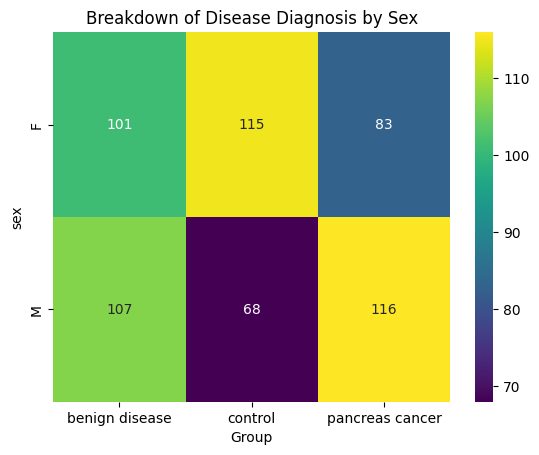

In [ ]:
# Demographics Visualizations

# Heatmap of Sex and Diagnosis
pt = pd.pivot_table(cleaned_pancreas, values = 'sample_id', index = ['sex'], columns = ['Group'], aggfunc = len, fill_value = 0)
sns.heatmap(pt, cmap = 'viridis', annot = True, fmt = 'g')
plt.title('Breakdown of Disease Diagnosis by Sex')

Text(0, 0.5, '# of individuals')

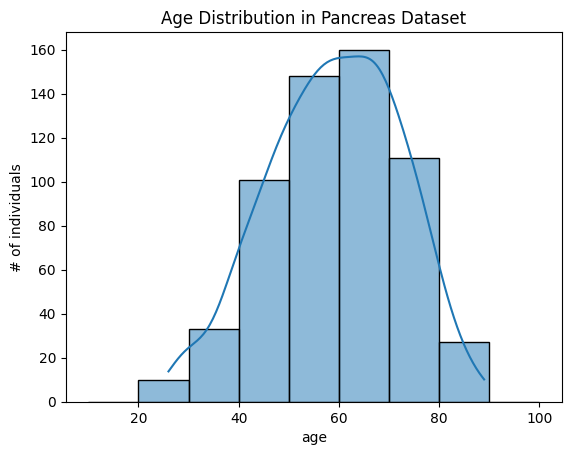

In [ ]:
# histogram for age distribution
sns.histplot(cleaned_pancreas['age'], kde = True, bins = range(10, 101, 10))
plt.title('Age Distribution in Pancreas Dataset')
plt.ylabel('# of individuals')

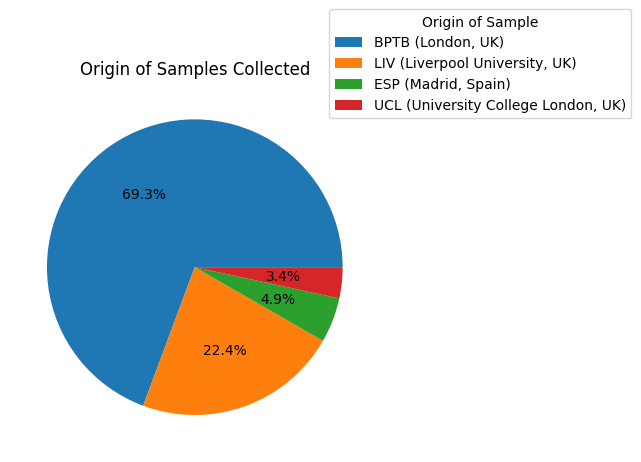

In [ ]:
# Pie Plot of the gender and where the samples originate from
origin_count = cleaned_pancreas['sample_origin'].value_counts()
labels = ['BPTB (London, UK)', 'LIV (Liverpool University, UK)', 'ESP (Madrid, Spain)', 'UCL (University College London, UK)']
plt.pie(origin_count, autopct = '%1.1f%%')
plt.title('Origin of Samples Collected')
plt.legend(title = 'Origin of Sample', labels = labels, loc="center right", bbox_to_anchor=(1, .55, 0.7, 1))




In [ ]:
cleaned_pancreas.shape


(590, 11)

In [ ]:
## Saving dataframe as a CSV for R data Analysis

cleaned_pancreas.to_csv("/content/drive/My Drive/MSHI/HI2023/Pancreas2.csv", index = False)

